In [215]:
import pickle
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import cv2
import numpy as np
from collections import Counter
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import cv2
import numpy as np


def find_directories(directory):
    # 將 directory 字符串轉換為 Path 對象
    root_dir = Path(directory)
    # 找到所有直接子資料夾
    directories = [str(d) for d in root_dir.iterdir() if d.is_dir()]
    
    return directories

def find_dcm_files(directory):
    root_dir = Path(directory)
    dcm_files = root_dir.rglob('*.dcm')
    dcm_file_paths = [str(file) for file in dcm_files]
    
    return dcm_file_paths

def display_dicom_image(filepath):
    dcm = pydicom.dcmread(filepath)
    dicom_file = pydicom.dcmread(filepath)
    
    image_data = dcm.pixel_array

    resized_image = cv2.resize(image_data, (256,256)) 
    normalized_image = resized_image / 255.0
    return np.array(normalized_image)

def draw_CR(image_data):
    
    plt.imshow(image_data, cmap='gray') 
    plt.axis('off')
    plt.show()

# 从文件中加载列表
with open('zip_lists.pkl', 'rb') as f:
    loaded_list1 = pickle.load(f)

with open('image_lists.pkl', 'rb') as f:
    loaded_list2 = pickle.load(f)

In [214]:
root_path = "./downloads/"
id_list = find_directories(root_path)
print((id_list))
total_folder_list = []
for path in id_list:
    total_folder_list+=find_directories(path)
print(total_folder_list)
all_floder_list = []
for path in total_folder_list:
    all_floder_list+=find_directories(path)
    
print(all_floder_list)

['downloads/group0', 'downloads/group1', 'downloads/group3', 'downloads/group2']
['downloads/group0/section9', 'downloads/group0/section7', 'downloads/group0/section0', 'downloads/group0/section1', 'downloads/group0/section6', 'downloads/group0/section8', 'downloads/group0/section3', 'downloads/group0/section4', 'downloads/group0/section5', 'downloads/group0/section2', 'downloads/group1/section19', 'downloads/group1/section10', 'downloads/group1/section17', 'downloads/group1/section16', 'downloads/group1/section11', 'downloads/group1/section18', 'downloads/group1/section14', 'downloads/group1/section13', 'downloads/group1/section12', 'downloads/group1/section15', 'downloads/group3/section30', 'downloads/group2/section21', 'downloads/group2/section26', 'downloads/group2/section28', 'downloads/group2/section29', 'downloads/group2/section27', 'downloads/group2/section20', 'downloads/group2/section25', 'downloads/group2/section22', 'downloads/group2/section23', 'downloads/group2/section24'

In [252]:
root_path = "./downloads/group8"
id_list = find_directories(root_path)
for path in id_list:
    file_paths = find_dcm_files(path)
    print(path +" : "+str(len(file_paths)))

downloads/group8/section88 : 103
downloads/group8/section86 : 100
downloads/group8/section81 : 100
downloads/group8/section80 : 101
downloads/group8/section87 : 103
downloads/group8/section89 : 11
downloads/group8/section82 : 101
downloads/group8/section85 : 101
downloads/group8/section84 : 102
downloads/group8/section83 : 102


In [219]:
def draw_CR(image_data):
    
    plt.imshow(image_data, cmap='gray') 
    plt.axis('off')
    plt.show()

In [220]:
print(loaded_list2[i+const].shape)

(256, 256)


941


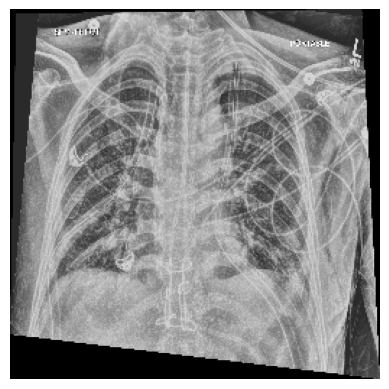

---------------------------------
190


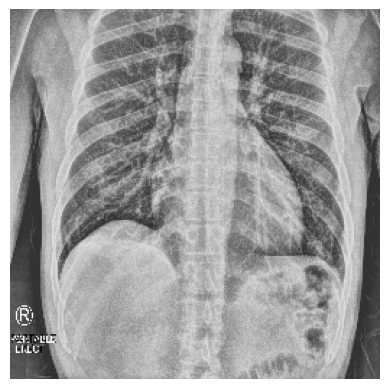

---------------------------------
932


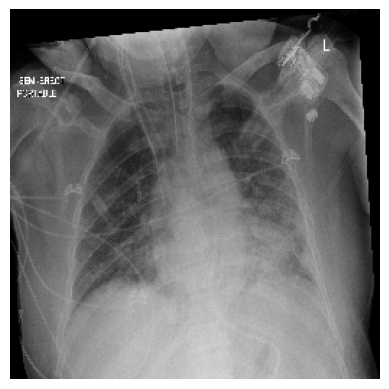

---------------------------------
953


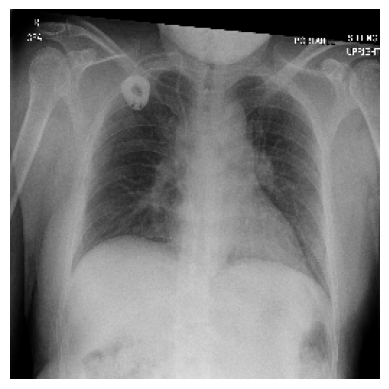

---------------------------------
941


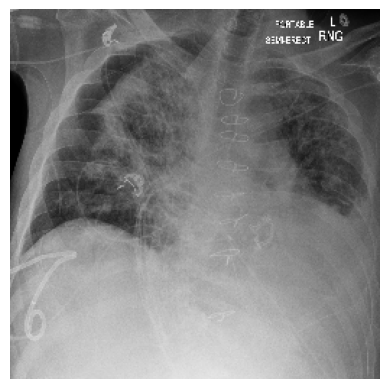

---------------------------------
190


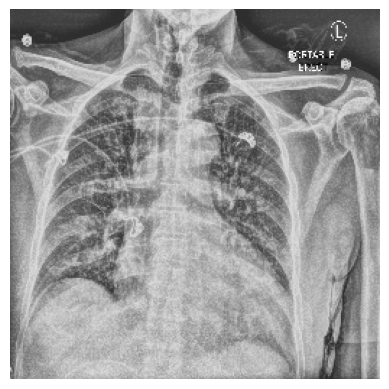

---------------------------------
190


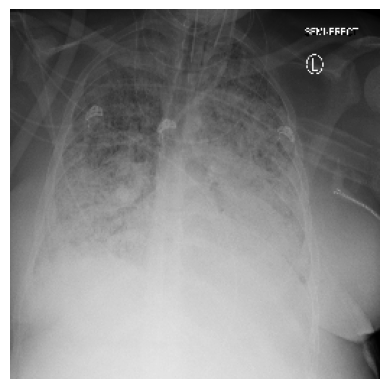

---------------------------------
941


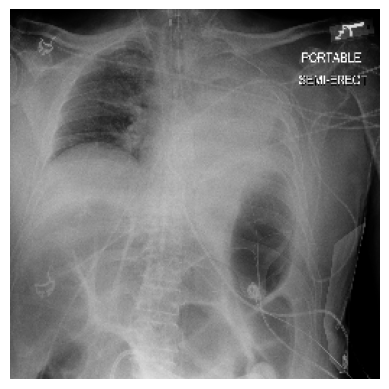

---------------------------------
944


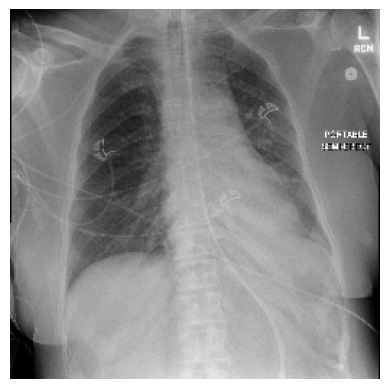

---------------------------------
190


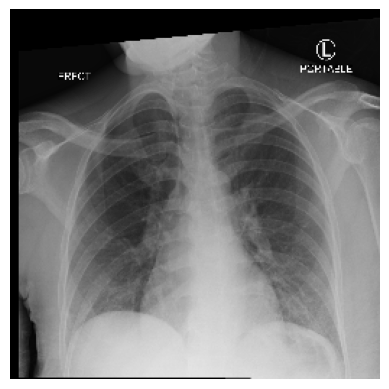

---------------------------------
800


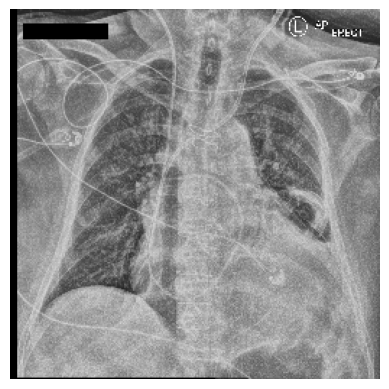

---------------------------------
945


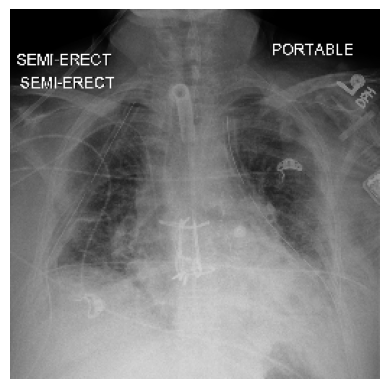

---------------------------------
482


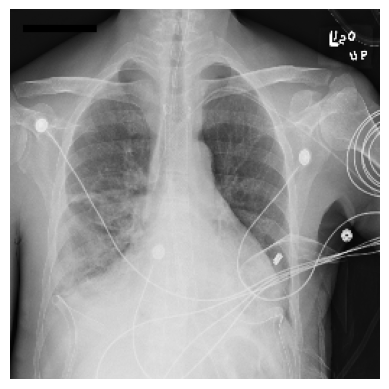

---------------------------------
941


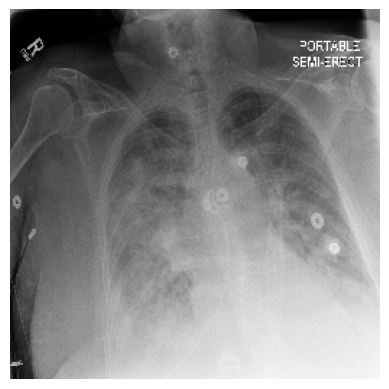

---------------------------------
941


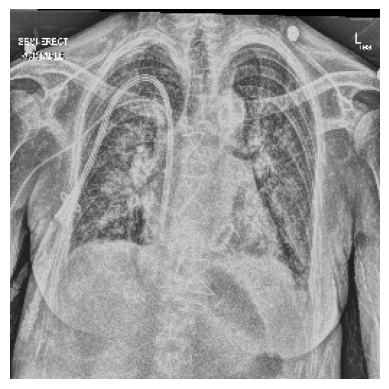

---------------------------------
190


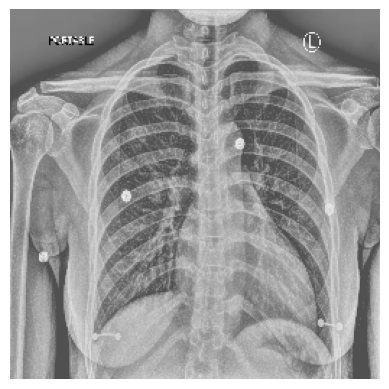

---------------------------------
772


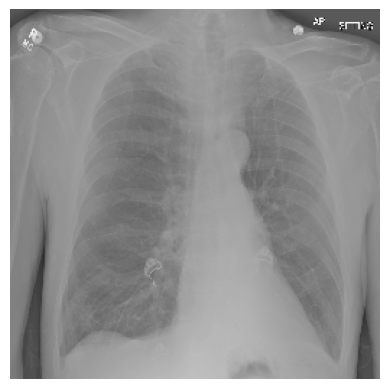

---------------------------------
941


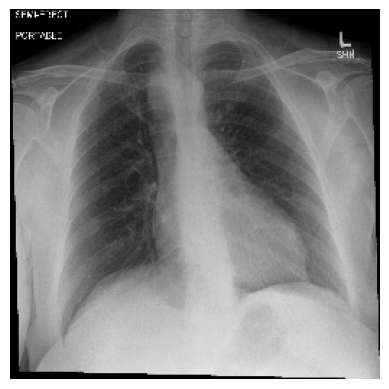

---------------------------------
0


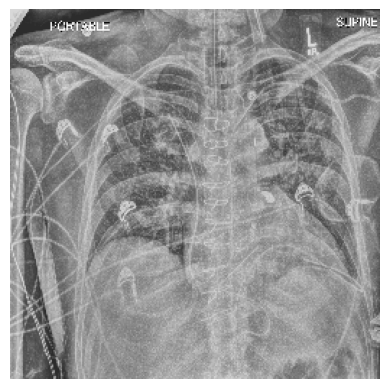

---------------------------------
482


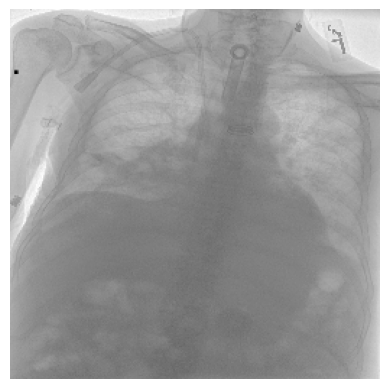

---------------------------------


In [247]:
const = 0
for i in range(20):
    print(loaded_list1[i+const])
    draw_CR(loaded_list2[i+const])
    print('---------------------------------')

In [382]:
def pick_first(loaded_list):
    new_list = []

    for item in loaded_list:
        try:
            number = int(item[0][0])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list

In [234]:
file_path = './MIDRC_Cases_table 334.csv' 
data_df = pd.read_csv(file_path)
zip_all = data_df['zip'].to_list()
new_list = pick_first(zip_all)
element_counts = Counter(new_list)
element_counts

Counter({-1: 4237,
         7: 3448,
         0: 2357,
         9: 1638,
         1: 1537,
         4: 1460,
         6: 1408,
         2: 1231,
         8: 1071,
         3: 47,
         5: 4})

In [249]:
new_list = pick_first(loaded_list1)
element_counts = Counter(new_list)
element_counts

Counter({9: 989, 4: 433, 0: 371, 1: 339, 8: 78, 7: 35, 2: 13, -1: 12, 5: 1})

In [275]:
import sys
import os, subprocess
import pandas as pd
import numpy as np
import pydicom
from PIL import Image
import glob
#import gdcm
#import pylibjpeg

# import some Gen3 packages
import gen3
from gen3.auth import Gen3Auth
from gen3.query import Gen3Query

cred = "credentials.json" # location of your MIDRC credentials, downloaded from https://data.midrc.org/identity by clicking "Create API key" button and saving the credentials.json locally
api = "https://data.midrc.org"

auth = Gen3Auth(api, refresh_file=cred) # authentication class
query = Gen3Query(auth) # query class

sex = "Male"
min_age = 0
max_age = 89

#### "nested" filters, these are attributes from other nodes that are nested under the case node ("child nodes" of case in the data model: data.midrc.org/dd)
## medications (vaccine data)
medication_manufacturer = ["Pfizer","Moderna"] #,"Janssen","AstraZeneca","Sinopharm","Novavax"]

## measurements filters (COVID-19 test data)
test_method = ["RT-PCR"] #,"Rapid antigen test"]
test_result_text = ["Negative"]

## conditions filters (co-morbidities and long COVID)
#condition_name = ["COVID-19","Post COVID-19 condition, unspecified"] #,"Pneumonia, organism unspecified"]

## procedures filters
procedure_name = ["Breathing Support"]

cases = query.raw_data_download(
                    data_type="case",
#                    fields=["project_id","submitter_id"],
                    fields=None,
                    filter_object={
                        "AND": [
                            #{"=": {"sex": sex}},
                            {">=": {"age_at_index": min_age}},
                            {"<=": {"age_at_index": max_age}},
                            #{"nested": {"path": "medications", "IN": {"medication_manufacturer": medication_manufacturer}}},
                            #{"nested": {"path": "measurements", "IN": {"test_method": test_method}}},
                            {"nested": {"path": "measurements", "IN": {"test_result_text": test_result_text}}},
                            #{"nested": {"path": "demographics", "NOT IN": {"zip": ['US','no data', 'Not Reported']}}},
                            #{"nested": {"path": "conditions", "IN": {"condition_name": condition_name}}},
                            #{"nested": {"path": "procedures", "IN": {"procedure_name": procedure_name}}}, # adding too many filters returns no data
                        ]
                    },
                    sort_fields=[{"submitter_id": "asc"}]
                )

if len(cases) > 0 and "submitter_id" in cases[0]:
    case_ids = [i['submitter_id'] for i in cases] ## make a list of the case (patient) IDs returned
    print("Query returned {} case IDs.".format(len(cases)))
    print("Data is a list with rows like this:\n\t {}".format(cases[0:1]))
else:
    print("Your query returned no data! Please, check that query parameters are valid.")
    
source_nodes = ["cr_series_file"]
modality = ["CR"]

## Search for specific files associated with our cohort by adding "case_ids" as a filter
# * Note: "fields" is set to "None" in this query, which by default returns all the properties available
data_files = query.raw_data_download(
                    data_type="data_file",
                    fields=None,
                    filter_object={
                        "AND": [
                            {"IN": {"case_ids": case_ids}},
                            #{"IN": {"source_node": source_nodes}},
                            {"IN": {"modality": ["CR"]}},
                            {"IN": {"body_part_examined": ["CHEST"]}},
                            {"IN": {"view_position": ["AP"]}},
                        ]
                    },
                    sort_fields=[{"submitter_id": "asc"}]
                )

if len(data_files) > 0:
    object_ids = [i['object_id'] for i in data_files if 'object_id' in i] ## make a list of the file object_ids returned by our query
    print("Query returned {} data files with {} object_ids.".format(len(data_files),len(object_ids)))
    print("Data is a list with rows like this:\n\t {}".format(data_files[0:1]))
else:
    print("Your query returned no data! Please, check that query parameters are valid.")

Query returned 42651 case IDs.
Data is a list with rows like this:
	 [{'_case_id': '15a63dee-0797-4ced-9082-8a4a78733a35', 'project_id': 'Open-A1', 'submitter_id': '10041569-CsJ4j1QCjEevfWxirCOSA', 'sex': 'Female', 'race': 'Black or African American', 'age_at_index': 67, 'index_event': 'First COVID test', 'zip': '190', 'covid19_positive': 'Yes', 'ethnicity': 'Not Hispanic or Latino', 'dataset_submitter_id': ['ACR_20230415'], '_imaging_studies_count': 3, '_cr_series_file_count': 1, '_mr_series_file_count': 0, '_dx_series_file_count': 2, '_ct_series_file_count': 0, 'object_id': ['dg.MD1R/a17c2c6a-e107-424f-a364-dc81dbc52846', 'dg.MD1R/45dc60cd-a957-4856-aac4-005527e3f92a', 'dg.MD1R/a85da94d-0c1b-4188-be71-ea76793bc039'], 'data_format': ['DCM'], 'data_type': ['DICOM'], 'data_category': ['DX', 'CR'], 'imaging_studies': [{'age_at_imaging': 67, 'body_part_examined': ['CHEST'], 'days_from_study_to_neg_covid_test': [766, 645], 'days_from_study_to_pos_covid_test': [796], 'days_to_study': -645, 

In [280]:
data_files[0]

{'_data_file_id': '4662145f-17a9-4917-8ae4-71582f8cbffc',
 'project_id': 'Open-R1',
 'submitter_id': '1.2.826.0.1.3680043.10.474.671385.31530',
 'series_uid': '1.2.826.0.1.3680043.10.474.671385.31530',
 'case_ids': ['639127-003706'],
 'object_id': 'dg.MD1R/b15bcd4d-957d-43bb-b895-2714d243eae4',
 'md5sum': 'da4e4dcb9f5167f7c7b0adbc4fd89f46',
 'file_name': '639127-003706/1.2.826.0.1.3680043.10.474.671385.31529/1.2.826.0.1.3680043.10.474.671385.31530.zip',
 'file_size': 15283840,
 'data_format': 'DCM',
 'data_type': 'DICOM',
 'data_category': 'CR',
 'lossy_image_compression': '00',
 'manufacturer': 'Carestream Health',
 'manufacturer_model_name': 'DRX-Revolution',
 'modality': 'CR',
 'series_description': 'AP',
 'source_node': 'cr_series_file',
 'image_type': ['DERIVED_PRIMARY'],
 'imager_pixel_spacing': [0.139],
 'pixel_spacing': [0.139],
 'view_position': ['AP'],
 'program_name': ['Open'],
 'project_code': ['R1'],
 '_dataset_id': ['b62f94d8-046e-49a6-a9d7-a1df828751d9',
  '193f6666-e6f5

In [399]:
aa = []
for data in data_files:
    try:
        if data['zip'][0]!='Not Reported' and data['zip'][0]!='US':
            aa.append(data['zip'][0])
    except:
        gaga = 4

In [397]:
print(aa)

['482', '190', '932', '482', '941', '190', '941', '949', '483', '482', '190', '895', '480', '190', '953', 'Not Reported', '939', '941', '948', '190', '190', '941', '483', '941', '0', '482', '482', '941', '480', '190', '0', '482', '482', '0', '941', '941', 'Not Reported', '482', '959', '946', '0', 'Not Reported', '0', '190', '945', '0', '941', '941', '190', '800', '941', '481', '982', '941', '483', '0', '0', '941', '0', '954', '941', 'Not Reported', '941', '956', '190', '190', '482', '190', '482', '941', '0', '480', '0', '945', '940', '954', '958', '852', '945', '482', '772', '0', 'Not Reported', '772', '481', '945', '0', '482', '952', '190', 'Not Reported', '941', '800', '0', '937', '941', 'Not Reported', '941', '190', '945', '482', '190', '941', '482', '941', '852', '941', '190', '481', 'Not Reported', '852', 'Not Reported', '952', '0', 'Not Reported', '941', '800', '953', '941', '480', '941', '941', '481', '481', '190', 'Not Reported', '773', '190', '483', '481', '481', '481', '190',

In [358]:
def pick_first_two(loaded_list):
    new_list = []
    for item in loaded_list:
        try:
            number = int(item[0][:2])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list

In [378]:
new_list = pick_first(aa)

In [398]:
a = Counter(aa)
a

Counter({'941': 2203,
         '0': 1692,
         '190': 1480,
         'Not Reported': 1335,
         '482': 1302,
         '945': 489,
         '481': 263,
         '480': 244,
         '940': 196,
         '946': 176,
         '483': 158,
         '772': 158,
         '953': 152,
         '948': 140,
         '800': 139,
         '956': 108,
         '949': 103,
         '937': 95,
         '950': 93,
         '954': 87,
         '852': 71,
         '939': 67,
         '932': 65,
         '952': 65,
         '951': 56,
         '272': 48,
         '875': 41,
         '936': 41,
         '957': 37,
         '492': 36,
         '958': 30,
         '955': 28,
         '000': 28,
         '944': 28,
         '959': 23,
         '773': 19,
         '947': 18,
         '883': 18,
         '895': 13,
         '731': 10,
         '885': 9,
         '273': 8,
         '967': 7,
         '982': 5,
         '451': 5,
         '960': 4,
         '961': 4,
         '973': 4,
         '484': 4,


In [276]:
sum=0
for i in range(11):
    sum+=a[i-1]
print(sum)

15553


In [287]:
print(len(data_files))

15553


In [406]:
fail_muf = 0
success = 0
man_list= []
man_list_481= []#481 480 483
man_list_480= []
man_list_483= []
man_list_482= []
for data in data_files:
    if data['zip']!='Not Request' and data['zip']!='US':
        try:
            #print(data['zip'][0])
            if data['zip'][0] == '481':
                man_list_481.append(data['manufacturer_model_name'])
            if data['zip'][0] == '482':
                man_list_482.append(data['manufacturer_model_name'])
            if data['zip'][0] == '483':
                man_list_483.append(data['manufacturer_model_name'])
            if data['zip'][0] == '480':
                man_list_480.append(data['manufacturer_model_name'])
        except:
            fail_muf+=1

In [407]:
print(len(man_list_481), success, fail_muf)

263 0 26


In [408]:
man_list_481_C = Counter(man_list_481)
man_list_482_C = Counter(man_list_482)
man_list_483_C = Counter(man_list_483)
man_list_480_C = Counter(man_list_480)

In [411]:
man_list_481_C

Counter({'DRX-Revolution': 235,
         'DRX-1': 23,
         'CR0975': 2,
         'DXD30_Wireless': 2,
         'DX-G': 1})

In [412]:
man_list_482_C

Counter({'DRX-Revolution': 843,
         'DRX-1': 311,
         'DX-G': 114,
         'CLASSIC CR': 23,
         'CR0975': 10,
         'DXD30_Wireless': 1})

In [413]:
man_list_483_C

Counter({'DRX-Revolution': 123, 'DRX-1': 28, 'CR0975': 7})

In [414]:
man_list_480_C

Counter({'DRX-Revolution': 147,
         'DRX-1': 57,
         'CR0975': 30,
         'CLASSIC CR': 6,
         'DX-G': 2,
         'DXD40_1000C': 1,
         'DXD30_Wireless': 1})

In [377]:
def pick_first(loaded_list):
    new_list = []
    for item in loaded_list:
        try:
            number = int(item[0])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list

In [338]:
man_a = Counter(man_list)
eva_map = {}
for name in man_a:
    eva_map[name] = [0,0,0]


In [347]:

for data in data_files:
    zip = 0
    try:
        if data['zip'][0]!='Not Request' and data['zip'][0]!='US':
            zip = pick_first(data['zip'])[0]
            #print(eva_map[data['manufacturer_model_name']])
            
            if zip == 4:
                eva_map[data['manufacturer_model_name']][0]+=1
            if zip == 1:
                eva_map[data['manufacturer_model_name']][1]+=1
            if zip == 9:
                print(eva_map[data['manufacturer_model_name']])
                eva_map[data['manufacturer_model_name']][2]+=1
    except:
        aaaaa = (data)
        break
        fail_muf+=1
aaaaa

{'_data_file_id': '9f9f2aeb-bfe0-4c54-b458-0cd3d1c86671',
 'project_id': 'Open-R1',
 'submitter_id': '1.2.826.0.1.3680043.10.474.419639.314786459342907131320772759850',
 'series_uid': '1.2.826.0.1.3680043.10.474.419639.314786459342907131320772759850',
 'case_ids': ['419639-010877'],
 'object_id': 'dg.MD1R/86390e03-dc67-4405-8c49-fc0adc90347d',
 'md5sum': '20756471d7fdda1f7057617d5cd28951',
 'file_name': '419639-010877/1.2.826.0.1.3680043.10.474.419639.174174631316348605053795859933/1.2.826.0.1.3680043.10.474.419639.314786459342907131320772759850.zip',
 'file_size': 14133344,
 'data_format': 'DCM',
 'data_type': 'DICOM',
 'data_category': 'CR',
 'lossy_image_compression': '00',
 'modality': 'CR',
 'series_description': 'AP',
 'source_node': 'cr_series_file',
 'image_type': ['DERIVED', 'PRIMARY'],
 'imager_pixel_spacing': [0.139, 0.139],
 'pixel_spacing': [0.139, 0.139],
 'view_position': ['AP'],
 'program_name': ['Open'],
 'project_code': ['R1'],
 '_dataset_id': ['38a6adc3-59bf-49dd-bbd

In [349]:
for name in man_a:
    if(eva_map[name]!=[0,0,0]):
        print(name, eva_map[name])
        


DRX-Revolution [1358, 1437, 0]
DRX-1 [420, 3, 0]
Discovery XR656 [0, 2, 0]
DX-G [117, 0, 0]
CR0975 [50, 26, 0]
DXD40_1000C [20, 0, 0]
Fluorospot Compact FD [0, 1, 0]
3543EZE [8, 0, 0]
CLASSIC CR [29, 0, 0]
DXD30_Wireless [11, 0, 0]


Counter({-1: 5422,
         9: 4337,
         4: 2013,
         0: 1720,
         1: 1490,
         8: 299,
         7: 197,
         2: 69,
         5: 3,
         3: 2,
         6: 1})